# Importing the Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Making the Dataset for Kmeans

In [2]:
X, Y = make_blobs(n_samples=500, centers = 5, random_state=3, n_features=2)

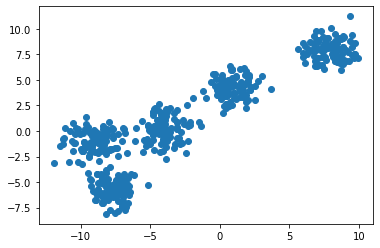

In [3]:
plt.scatter(X[:,0],X[:,1])

# Initializing cluster Centers

In [4]:
k = 5
color =["green", "blue", "red", "yellow", "orange"]
clusters = {}

for i in range(k):
    center = 10*(2*np.random.random((X.shape[1],))-1)
    points = []
    cluster ={
        'center' : center,
        'points' : points,
        'color' : color[i]
    }
    clusters[i] = cluster

In [5]:
clusters

{0: {'center': array([0.6454781 , 8.98899976]),
  'points': [],
  'color': 'green'},
 1: {'center': array([ 6.81692944, -1.25330672]),
  'points': [],
  'color': 'blue'},
 2: {'center': array([ 0.43902294, -0.53728885]),
  'points': [],
  'color': 'red'},
 3: {'center': array([7.60953838, 3.87137407]),
  'points': [],
  'color': 'yellow'},
 4: {'center': array([ 1.79877965, -1.78272634]),
  'points': [],
  'color': 'orange'}}

# Writing the Required Functions to Implement Kmeans

In [6]:
def distance(v1, v2):
    return np.sqrt(np.sum((v1-v2)**2))


In [7]:
def assignToClusters(clusters): #E - step
    for ix in range(X.shape[0]):
        dist = []
        curr_x = X[ix]
    
        for kx in range(k):
            d = distance(curr_x, clusters[kx]['center'])
            dist.append(d)
        current_cluster = np.argmin(dist)
        clusters[current_cluster]['points'].append(curr_x)

def updateClusters(clusters):
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        if pts.shape[0] > 0:
            center = np.mean(pts, axis=0)
            clusters[kx]['center'] = center
            clusters[kx]['points'] = []
        
def plotClusters(clusters):
    for kx in range(k):
        print(np.array(clusters[kx]['points']).shape)
        pts = np.array(clusters[kx]['points'])
        try:
            plt.scatter(pts[:,0], pts[:,1], color = clusters[kx]['color'])
        except:
            pass
        uk = clusters[kx]['center']
        plt.scatter(uk[0], uk[1], color="black", marker="*")

(50, 2)
(0,)
(349, 2)
(101, 2)
(0,)


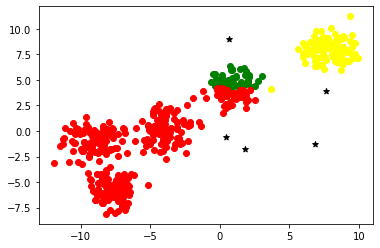

In [8]:
assignToClusters(clusters)
plotClusters(clusters)

(100, 2)
(0,)
(698, 2)
(202, 2)
(0,)


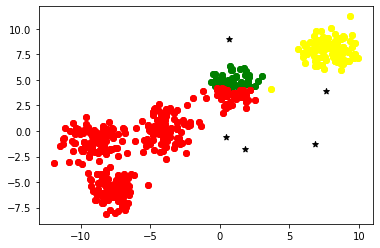

In [9]:
assignToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)

(101, 2)
(0,)
(297, 2)
(100, 2)
(2, 2)


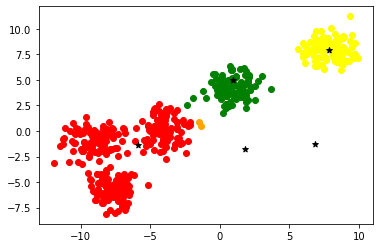

In [10]:
assignToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)

(98, 2)
(0,)
(226, 2)
(100, 2)
(76, 2)


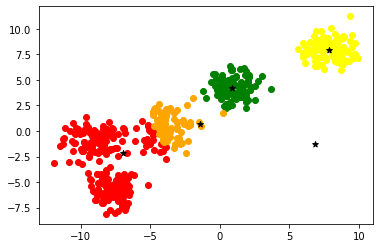

In [11]:
assignToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)

(100, 2)
(0,)
(198, 2)
(100, 2)
(102, 2)


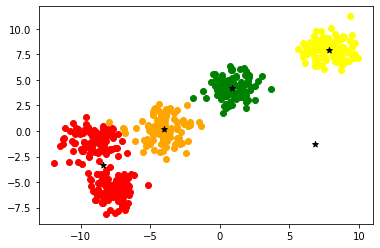

In [13]:
assignToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)

# Verifying it Using Sklearn

In [15]:
from sklearn.cluster import KMeans

In [16]:
X,Y = make_blobs(n_samples=500, n_features=2, centers=5, random_state=3)

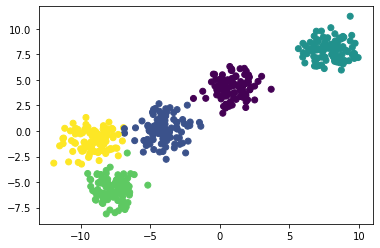

In [17]:
plt.scatter(X[:,0],X[:,1],c=Y)

In [18]:
kmeans = KMeans(n_clusters=5)

In [19]:
kmeans.fit(X,Y)

KMeans(n_clusters=5)

In [20]:
centers = kmeans.cluster_centers_

In [21]:
labels = kmeans.labels_

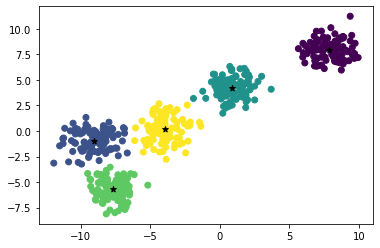

In [22]:
plt.scatter(X[:,0], X[:,1], c=labels)
plt.scatter(centers[:,0], centers[:,1], color="black", marker="*")